# **Data Understanding**

In [1]:
import pandas as pd

df = pd.read_csv('Walmart_Sales.csv')

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [3]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

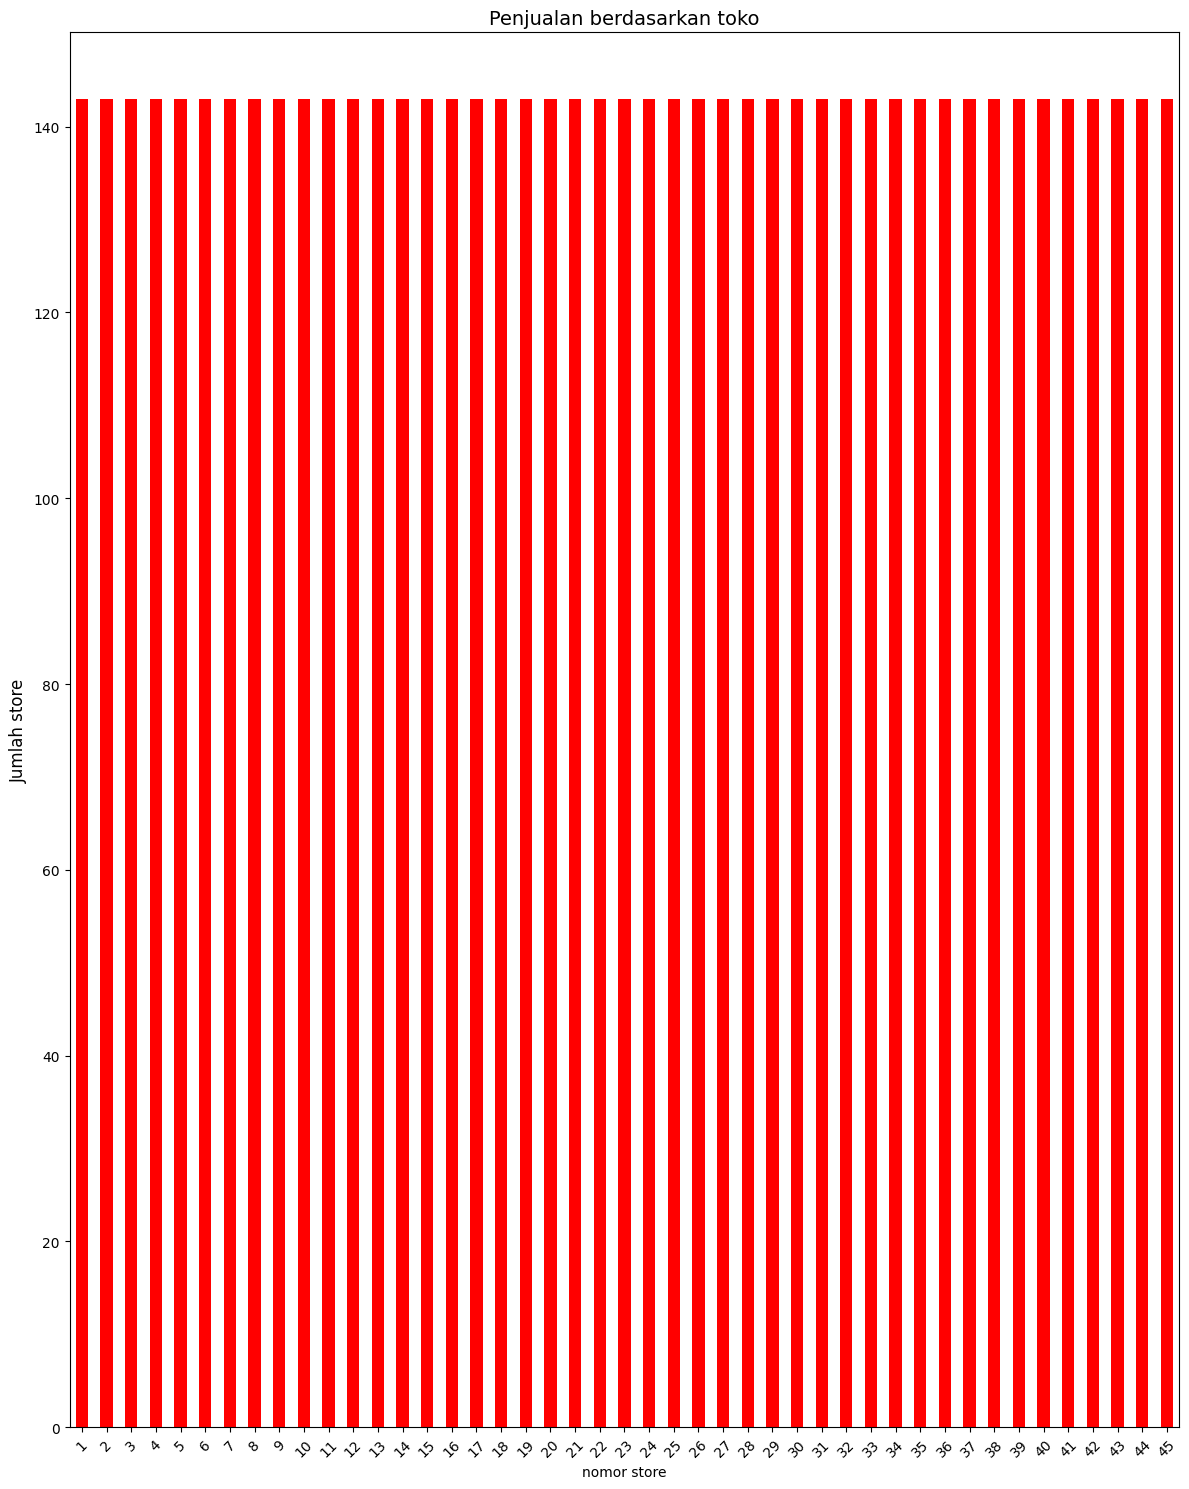

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

sales_walmart = pd.read_csv('Walmart_Sales.csv')

plt.figure(figsize=(12, 15))
sales_by_brand = sales_walmart['Store'].value_counts()
sales_by_brand.plot(kind='bar', color='red')
plt.title('Penjualan berdasarkan toko', fontsize=14)
plt.xlabel('nomor store')
plt.ylabel('Jumlah store', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


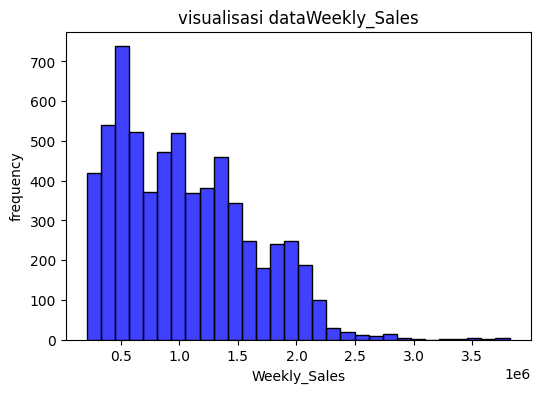

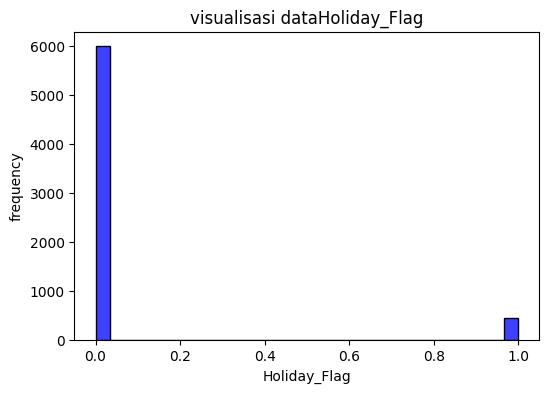

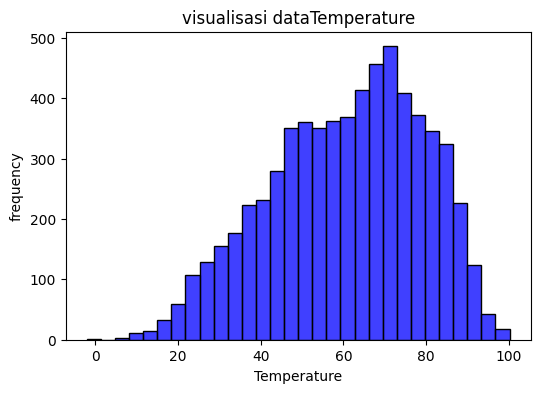

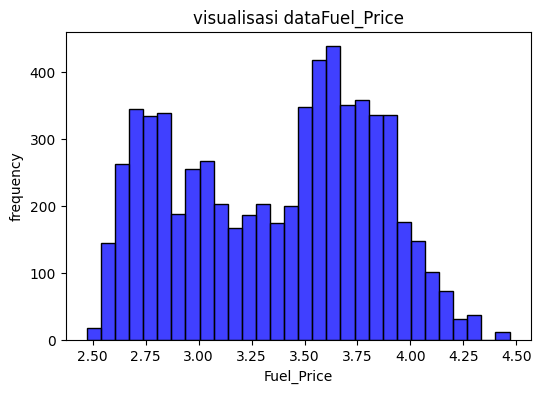

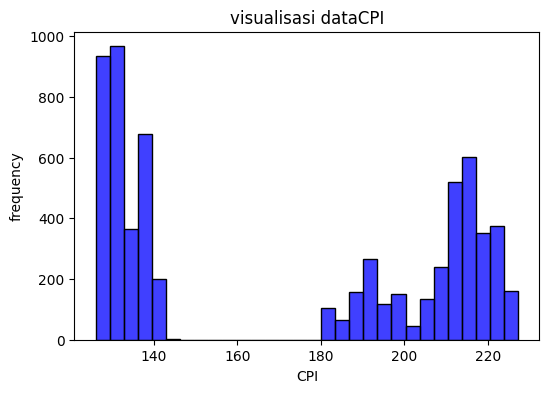

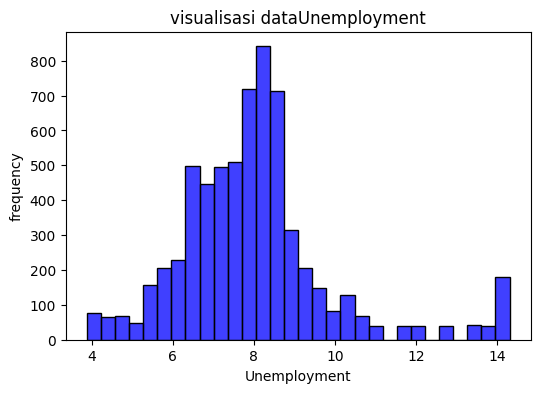

In [7]:
import seaborn as sns

numerical_columns = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

#Plot histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[column], bins=30, color='blue')
    plt.title('visualisasi data' + column)
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.show()

# **Data Preparation**

In [8]:
df_drop = df.drop(columns='Unemployment')
df_drop

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143
...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854


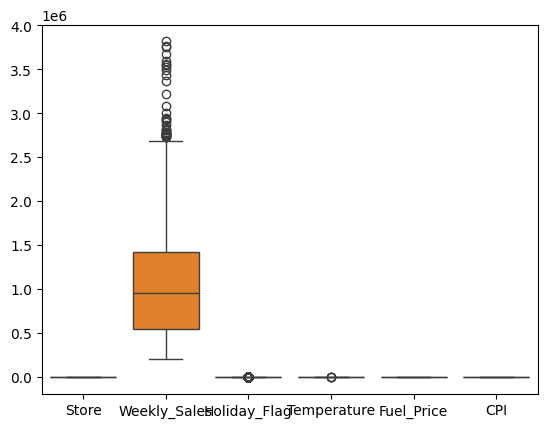

In [9]:
sns.boxplot(df_drop)
plt.show()

In [10]:
df_hapus = df_drop
coloumns = 'Weekly_Sales'

Q1 = df_hapus[coloumns].quantile(0.25)
Q3 = df_hapus[coloumns].quantile(0.75)
IQR = Q3 - Q1


df_hapus.loc[df_hapus[coloumns] < (Q1 - 1.5 * IQR ), coloumns] = (Q1 - 1.5 * IQR )
df_hapus.loc[df_hapus[coloumns] > (Q3 + 1.5 * IQR ), coloumns] = (Q3 + 1.5 * IQR )
print(df_hapus)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  
0     211.096358  
1

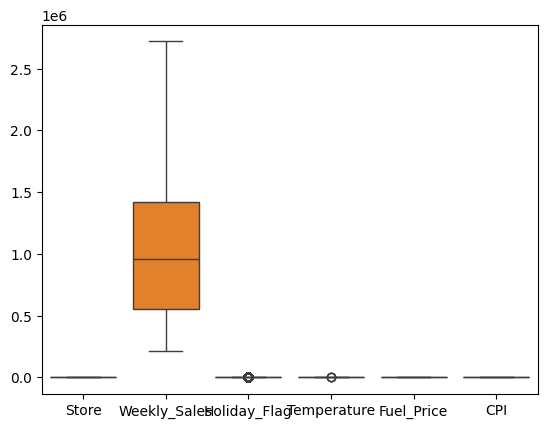

In [11]:
sns.boxplot(df_hapus)
plt.show()

In [12]:
df_hapus1 = df_hapus
coloumns = 'Holiday_Flag'

Q1 = df_hapus1[coloumns].quantile(0.25)
Q3 = df_hapus1[coloumns].quantile(0.75)
IQR = Q3 - Q1


df_hapus1.loc[df_hapus1[coloumns] < (Q1 - 1.5 * IQR ), coloumns] = (Q1 - 1.5 * IQR )
df_hapus1.loc[df_hapus1[coloumns] > (Q3 + 1.5 * IQR ), coloumns] = (Q3 + 1.5 * IQR )
print(df_hapus1)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             0        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  
0     211.096358  
1

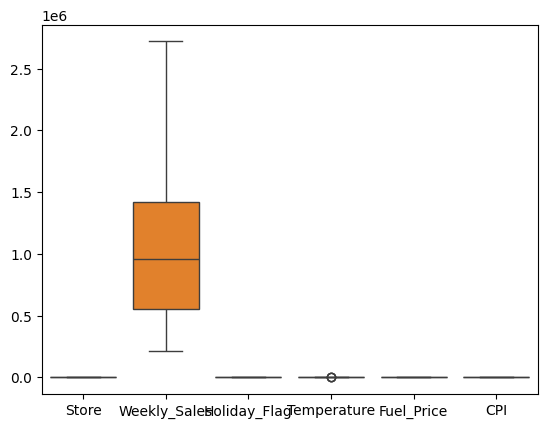

In [13]:
sns.boxplot(df_hapus1)
plt.show()

In [14]:
df_hapus2 = df_hapus1
coloumns = 'Temperature'

Q1 = df_hapus2[coloumns].quantile(0.25)
Q3 = df_hapus2[coloumns].quantile(0.75)
IQR = Q3 - Q1


df_hapus2.loc[df_hapus2[coloumns] < (Q1 - 1.5 * IQR ), coloumns] = (Q1 - 1.5 * IQR )
df_hapus2.loc[df_hapus2[coloumns] > (Q3 + 1.5 * IQR ), coloumns] = (Q3 + 1.5 * IQR )
print(df_hapus2)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             0        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  
0     211.096358  
1

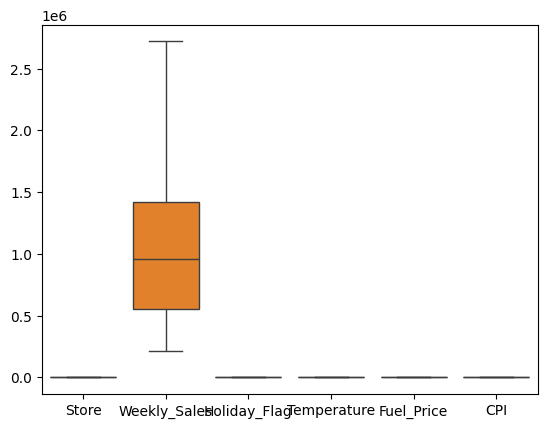

In [15]:
sns.boxplot(df_hapus2)
plt.show()

# **Clustering**


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [17]:
# Pastikan kolom numerik dipilih setelah groupby
df_ag = (
    df_hapus2.groupby('Fuel_Price')
    .agg({
        col: ['count', 'mean', 'sum'] for col in df_hapus2.select_dtypes(include='number').columns
    })
    .reset_index()
)

print(df_ag)


    Fuel_Price Store                 Weekly_Sales                             \
               count       mean  sum        count          mean          sum   
0        2.472     1  36.000000   36            1  4.702810e+05    470281.03   
1        2.513     1  36.000000   36            1  4.344714e+05    434471.38   
2        2.514    14  17.571429  246           14  1.015099e+06  14211389.79   
3        2.520     1  36.000000   36            1  4.475194e+05    447519.44   
4        2.533     1  36.000000   36            1  4.312945e+05    431294.45   
..         ...   ...        ...  ...          ...           ...          ...   
887      4.294     6  27.166667  163            6  8.758470e+05   5255081.92   
888      4.301     6  27.166667  163            6  8.531141e+05   5118684.85   
889      4.308     3  28.333333   85            3  8.875630e+05   2662689.06   
890      4.449     6  27.166667  163            6  8.440218e+05   5064130.51   
891      4.468     6  27.166667  163    

In [18]:
from sklearn.cluster import KMeans
inert = []

for i in range (1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_ag)
  inert.append(kmeans.inertia_)

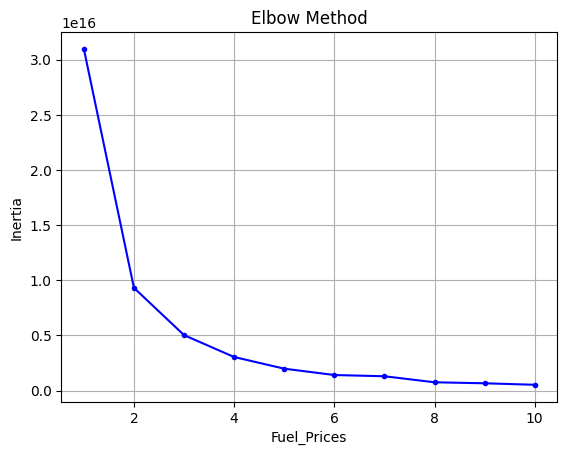

In [19]:
#memperlihatkan data fuel price 1-11
plt.plot(range(1, 11), inert, marker='.', color='b')
plt.xlabel('Fuel_Prices')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [20]:
kmeans.set_params(n_clusters=2)
kmeans.fit(df_ag)

KMeans(n_clusters=2)

In [21]:
df_ag['Cluster'] = kmeans.labels_
df_ag

Fuel_Price Store                 Weekly_Sales                             \
               count       mean  sum        count          mean          sum   
0        2.472     1  36.000000   36            1  4.702810e+05    470281.03   
1        2.513     1  36.000000   36            1  4.344714e+05    434471.38   
2        2.514    14  17.571429  246           14  1.015099e+06  14211389.79   
3        2.520     1  36.000000   36            1  4.475194e+05    447519.44   
4        2.533     1  36.000000   36            1  4.312945e+05    431294.45   
..         ...   ...        ...  ...          ...           ...          ...   
887      4.294     6  27.166667  163            6  8.758470e+05   5255081.92   
888      4.301     6  27.166667  163            6  8.531141e+05   5118684.85   
889      4.308     3  28.333333   85            3  8.875630e+05   2662689.06   
890      4.449     6  27.166667  163            6  8.440218e+05   5064130.51   
891      4.468     6  27.166667  163            6  8.659708e+05   5195825.00   

    Holiday_Flag          Temperature                    Fuel_Price         \
           count mean sum       count       mean     sum      count   mean   
0              1  0.0   0           1  45.660000   45.66          1  2.472   
1              1  0.0   0           1  80.580000   80.58          1  2.513   
2             14  0.0   0          14  42.822143  599.51         14  2.514   
3              1  0.0   0           1  50.870000   50.87          1  2.520   
4              1  0.0   0           1  82.290000   82.29          1  2.533   
..           ...  ...  ..         ...        ...     ...        ...    ...   
887            6  0.0   0           6  66.710000  400.26          6  4.294   
888            6  0.0   0           6  68.758333  412.55          6  4.301   
889            3  0.0   0           3  86.730000  260.19          3  4.308   
890            6  0.0   0           6  71.158333  426.95          6  4.449   
891            6  0.0   0           6  74.486667  446.92          6  4.468   

              CPI                          Cluster  
        sum count        mean          sum          
0     2.472     1  210.045102   210.045102       1  
1     2.513     1  210.264116   210.264116       1  
2    35.196    14  211.559152  2961.828132       0  
3     2.520     1  210.077189   210.077189       1  
4     2.533     1  210.296663   210.296663       1  
..      ...   ...         ...          ...     ...  
887  25.764     6  130.967097   785.802581       1  
888  25.806     6  131.193097   787.158581       1  
889  12.924     3  131.098323   393.294968       1  
890  26.694     6  131.149968   786.899806       1  
891  26.808     6  131.108333   786.650000       1  

[892 rows x 20 columns]

In [22]:
predict = kmeans.predict(df_ag.drop(columns=['Cluster']))
predict

C:\Users\Rizki\AppData\Local\Temp\ipykernel_10464\2088622239.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  predict = kmeans.predict(df_ag.drop(columns=['Cluster']))


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [23]:
from sklearn.decomposition import PCA
pca_df = PCA(n_components=2)
pca_df = pca_df.fit_transform(df_ag)

In [24]:
pca_df = pd.DataFrame(pca_df, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = predict

<Axes: xlabel='PCA1', ylabel='PCA2'>

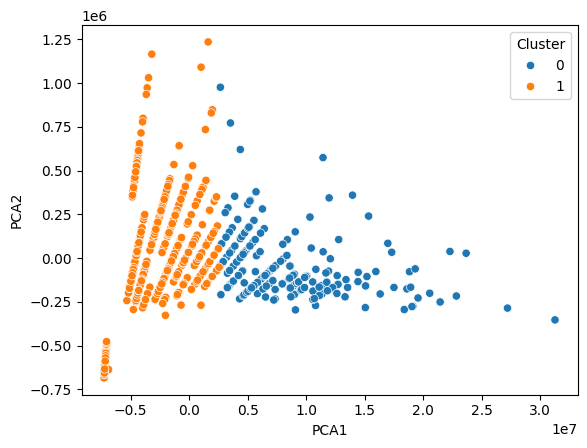

In [25]:
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df)

In [26]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_ag, predict)
print ("silhouette score:", score)

silhouette score: 0.6798481593007785


### Evaluate the model (before tuning)

In [27]:
param_grid = {
    'n_clusters': range(2, 5),
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [300, 500, 700]
}

In [28]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid)
grid_search.fit(df_ag)

c:\Users\Rizki\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KMeans(),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [300, 500, 700], 'n_clusters': range(2, 5),
                         'n_init': [10, 20, 30]})

In [29]:
pca_df = PCA(n_components=2)
pca_df = pca_df.fit_transform(df_ag)

In [30]:
#Buat dataframe hasil PCA untuk visualisasi
pca_df = pd.DataFrame(pca_df, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = predict

<Axes: xlabel='PCA1', ylabel='PCA2'>

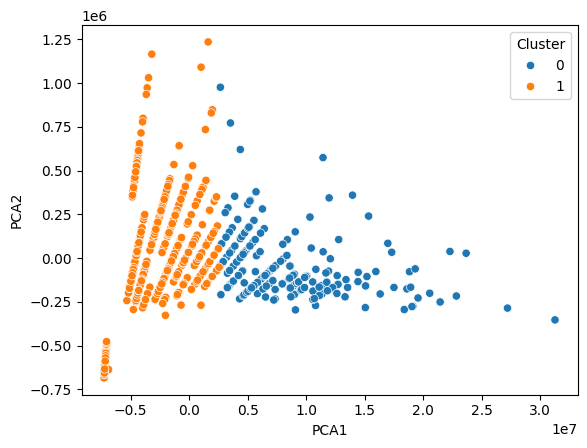

In [31]:
#Visualisasi plot klusterisasi
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df)

In [32]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_ag, predict)
print("Silhouette Score: ", score)


Silhouette Score:  0.6798481593007785


# **Model Tuning**

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
#entukan parameter yang ingin dicoba
param_grid = {
        'n_clusters': range(3, 8),
        'init': ['k-means++', 'random'],
        'n_init': [10, 20, 30],
        'max_iter': [300, 500, 700]
}

In [35]:
#Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid)

In [36]:
#Fit model dengan data training
grid_search.fit(df_ag)

c:\Users\Rizki\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KMeans(),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [300, 500, 700], 'n_clusters': range(3, 8),
                         'n_init': [10, 20, 30]})

In [37]:
#Tampilkan hasil (parameter dan silhouute score) dari Grid Search
best_score = -1
best_params = None

In [38]:
for params in grid_search.cv_results_['params']:
    model = KMeans(**params)
    cluster_labels = model.fit_predict(df_ag)
    score = silhouette_score(df_ag, cluster_labels)

    if score > best_score:
        best_score = score
        best_params = params

In [39]:
#Print hasil dari Grid Search untuk parameter dan skor terbaik
print("Parameter terbaiknya :\n", best_params)
print("Score terbaiknya :\n", best_score)

Parameter terbaiknya :
 {'init': 'random', 'max_iter': 300, 'n_clusters': 7, 'n_init': 10}
Score terbaiknya :
 0.6547088447302486


# **Linear Regression**

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder

In [41]:
# Inisialisasi encoder
encoder = OrdinalEncoder()

# Transformasi data
df_hapus2["Date"] = encoder.fit_transform(df_hapus2[["Date"]])

# Periksa hasil
print(df_hapus2["Date"].head())

0     19.0
1     52.0
2     85.0
3    118.0
4     20.0
Name: Date, dtype: float64


In [42]:
df_hapus2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI
0,1,19.0,1643690.90,0,42.31,2.572,211.096358
1,1,52.0,1641957.44,0,38.51,2.548,211.242170
2,1,85.0,1611968.17,0,39.93,2.514,211.289143
3,1,118.0,1409727.59,0,46.63,2.561,211.319643
4,1,20.0,1554806.68,0,46.50,2.625,211.350143


In [43]:
x = df_hapus2.drop(columns=['Weekly_Sales'])
y = df_hapus2['Weekly_Sales']

print('Variabel Independent :\n', x.head())
print('Variabel Dependent :\n', y.head())

Variabel Independent :
    Store   Date  Holiday_Flag  Temperature  Fuel_Price         CPI
0      1   19.0             0        42.31       2.572  211.096358
1      1   52.0             0        38.51       2.548  211.242170
2      1   85.0             0        39.93       2.514  211.289143
3      1  118.0             0        46.63       2.561  211.319643
4      1   20.0             0        46.50       2.625  211.350143
Variabel Dependent :
 0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
lin = LinearRegression()
lin.fit(x_train, y_train)

LinearRegression()

In [46]:
y_predict = lin.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [48]:
intercept = lin.intercept_
coefi = lin.coef_

In [49]:
print("Interceptnya :\n", intercept)
print("Coefisiennya :\n", coefi)

Interceptnya :
 1805673.7424189488
Coefisiennya :
 [-1.55388479e+04 -3.12749368e+02 -4.54747351e-13 -1.27335595e+03
  7.40573953e+03 -1.91670874e+03]


In [50]:
x_constant = sm.add_constant(x)
ols_lin = sm.OLS(y, x_constant)
result = ols_lin.fit()

In [51]:
print("P-Valuenya :\n", result.pvalues)

P-Valuenya :
 const           5.063626e-163
Store           5.666320e-197
Date             1.352971e-01
Holiday_Flag     6.574137e-02
Temperature      1.056726e-04
Fuel_Price       1.662389e-01
CPI              2.613393e-29
dtype: float64


In [52]:
mse = mean_squared_error(y_test, y_predict)
print("Mse-nya :\n", mse)

Mse-nya :
 265686282275.13214


In [53]:
r2 = r2_score(y_test, y_predict)
print("R2-nya :\n", r2)

R2-nya :
 0.1494393949949172
